<a href="https://colab.research.google.com/github/sri-sudha14/Machine-Learning/blob/main/ML_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XGBOOST

Breast cancer tumor prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [2]:
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
print(dataset.head(5))

(683, 11)
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3              

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
models = []

from sklearn.linear_model import LogisticRegression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
models.append(('LDA', LinearDiscriminantAnalysis()))

from sklearn.neighbors import KNeighborsClassifier
models.append(('KNN', KNeighborsClassifier()))

from sklearn.tree import DecisionTreeClassifier
models.append(('CART', DecisionTreeClassifier()))

from sklearn.naive_bayes import GaussianNB
models.append(('NB', GaussianNB()))

from sklearn.svm import SVC
models.append(('SVM', SVC(gamma='auto')))

LR: 0.653838 (0.005145)
LDA: 0.965219 (0.027599)
KNN: 0.613367 (0.053558)
CART: 0.937778 (0.030910)
NB: 0.759495 (0.069983)
SVM: 0.661145 (0.012622)


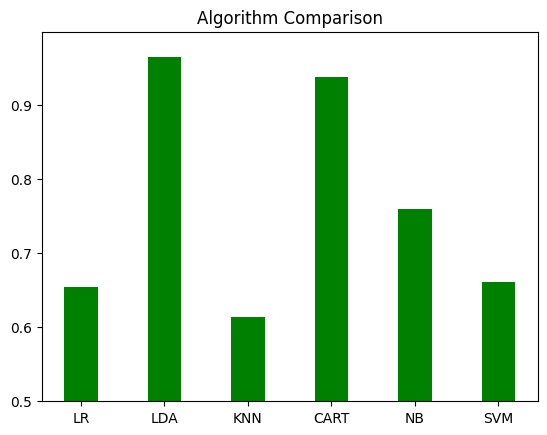

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score , StratifiedKFold

results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print(f"{name}: {(cv_results.mean()):.6f} ({(cv_results.std()):.6f})")

plt.ylim(.500, .999)
plt.bar(names, res, color ='green', width = 0.4)

plt.title('Algorithm Comparison')
plt.show()